In [2]:
# using py39 env
#!pip install unstructured

In [3]:
import os
from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import elements_to_json
import IPython
from IPython import display

In [5]:
root = "/home/ubuntu/codebase/my_github/generative-ai-experiments/unstructured-library/"
output_dir = f"{root}/Output"

### Trial 1

In [ ]:
filename = f"{root}/study_protocols/Prot_SAP_002.pdf"

In [6]:
# Define parameters for Unstructured's library
strategy = "hi_res" # Strategy for analyzing PDFs and extracting table structure
model_name = "yolox" # Best model for table extraction. Other options are detectron2_onnx and chipper depending on file layout

# Extracts the elements from the PDF
elements = partition_pdf(
filename=filename, 
strategy=strategy, 
infer_table_structure=True, 
model_name=model_name
)

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
len(elements)

1032

In [16]:
elements[0:15]

In [20]:
elements[210:230]

In [26]:
elements[228]

In [32]:
type(elements[228]), elements[228].__dir__()

(unstructured.documents.elements.Table,
 ['text',
  'embeddings',
  'id',
  'metadata',
  '__module__',
  '__doc__',
  'category',
  '__abstractmethods__',
  '_abc_impl',
  '__init__',
  '__str__',
  '__eq__',
  'to_dict',
  'apply',
  '__hash__',
  'id_to_uuid',
  'convert_coordinates_to_new_system',
  '__dict__',
  '__weakref__',
  '__slots__',
  '__repr__',
  '__getattribute__',
  '__setattr__',
  '__delattr__',
  '__lt__',
  '__le__',
  '__ne__',
  '__gt__',
  '__ge__',
  '__new__',
  '__reduce_ex__',
  '__reduce__',
  '__subclasshook__',
  '__init_subclass__',
  '__format__',
  '__sizeof__',
  '__dir__',
  '__class__'])

In [33]:
elements[228].id, elements[228].metadata, elements[228].text

('34f06c429e0ad15d7124b22b55b7a60d',
 ElementMetadata(coordinates=CoordinatesMetadata(points=((344.7955322265625, 197.3468475341797), (344.7955322265625, 470.82499999999953), (1514.935791015625, 470.82499999999953), (1514.935791015625, 197.3468475341797)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7f82c01e3970>), data_source=None, filename='Prot_SAP_002.pdf', file_directory='/home/ubuntu/codebase/my_github/generative-ai-experiments/unstructured-library//study_protocols', last_modified='2023-11-27T19:39:04', filetype='application/pdf', attached_to_filename=None, parent_id='81760e97e9c1b5114829f35fa89cab88', category_depth=None, image_path=None, languages=None, page_number=18, page_name=None, url=None, link_urls=None, link_texts=None, links=None, sent_from=None, sent_to=None, subject=None, section=None, header_footer_type=None, emphasized_text_contents=None, emphasized_text_tags=None, text_as_html='<table><thead><th>Dose Level</th><th>Loperamide Dose</th><th>Table

In [36]:
elements[228].metadata

ElementMetadata(coordinates=CoordinatesMetadata(points=((344.7955322265625, 197.3468475341797), (344.7955322265625, 470.82499999999953), (1514.935791015625, 470.82499999999953), (1514.935791015625, 197.3468475341797)), system=<unstructured.documents.coordinates.PixelSpace object at 0x7f82c01e3970>), data_source=None, filename='Prot_SAP_002.pdf', file_directory='/home/ubuntu/codebase/my_github/generative-ai-experiments/unstructured-library//study_protocols', last_modified='2023-11-27T19:39:04', filetype='application/pdf', attached_to_filename=None, parent_id='81760e97e9c1b5114829f35fa89cab88', category_depth=None, image_path=None, languages=None, page_number=18, page_name=None, url=None, link_urls=None, link_texts=None, links=None, sent_from=None, sent_to=None, subject=None, section=None, header_footer_type=None, emphasized_text_contents=None, emphasized_text_tags=None, text_as_html='<table><thead><th>Dose Level</th><th>Loperamide Dose</th><th>Tablets/Capsules per day</th></thead><tr><t

In [38]:
print(elements[228].metadata.text_as_html)

<table><thead><th>Dose Level</th><th>Loperamide Dose</th><th>Tablets/Capsules per day</th></thead><tr><td>0</td><td>4 mg TID</td><td>6 tablets/capsules a day</td></tr><tr><td>-1</td><td>4 mg BID</td><td>4 tablets/capsules a day</td></tr><tr><td>-2</td><td>2 mg TID</td><td>3 tablets/capsules a day</td></tr><tr><td>-3</td><td>2 mg BID</td><td>2 tablets/capsules a day</td></tr><tr><td>-4</td><td>2 mg once a day</td><td>1 tablet/capsule a day</td></tr></table>


### test 1

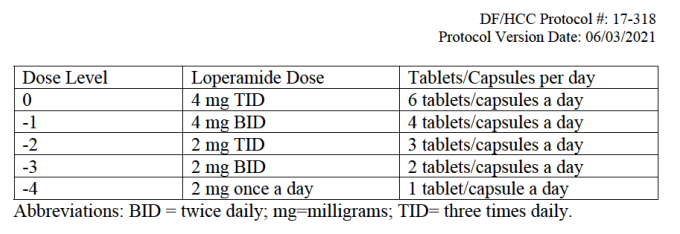

In [62]:
display.Image(f"{root}/study_protocol_images/protocol_002_img01_page18.png")

In [39]:
# Page 18
IPython.display.HTML(elements[228].metadata.text_as_html)

0,4 mg TID,6 tablets/capsules a day
-1,4 mg BID,4 tablets/capsules a day
-2,2 mg TID,3 tablets/capsules a day
-3,2 mg BID,2 tablets/capsules a day
-4,2 mg once a day,1 tablet/capsule a day


### test 2

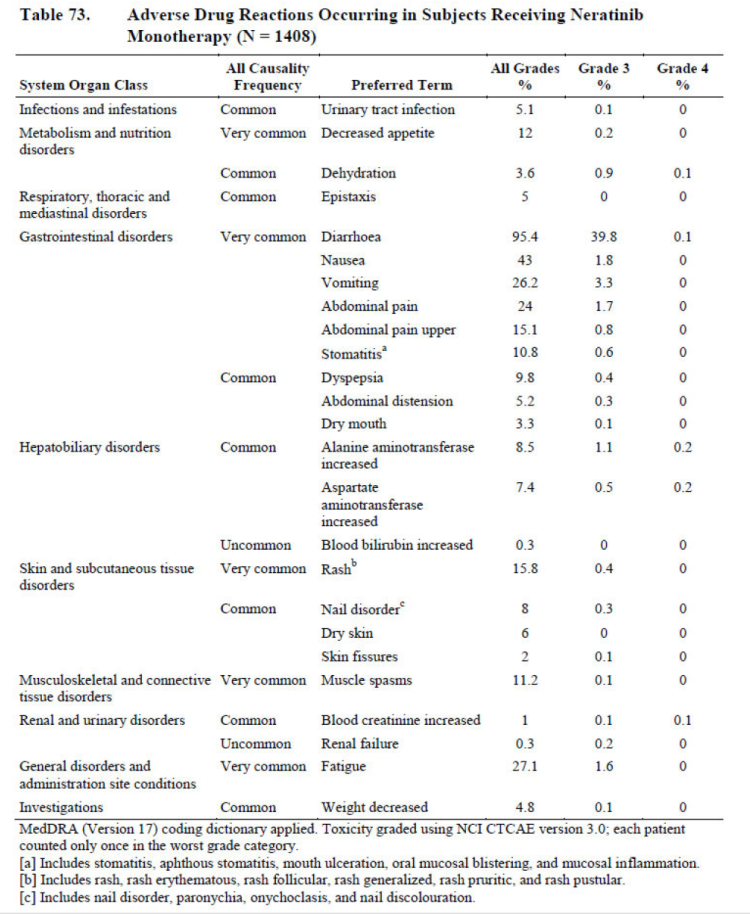

In [67]:
display.Image(f"{root}/study_protocol_images/protocol_002_img02_page29.png")

In [60]:
# page 29
IPython.display.HTML(elements[371].metadata.text_as_html)

### test 3

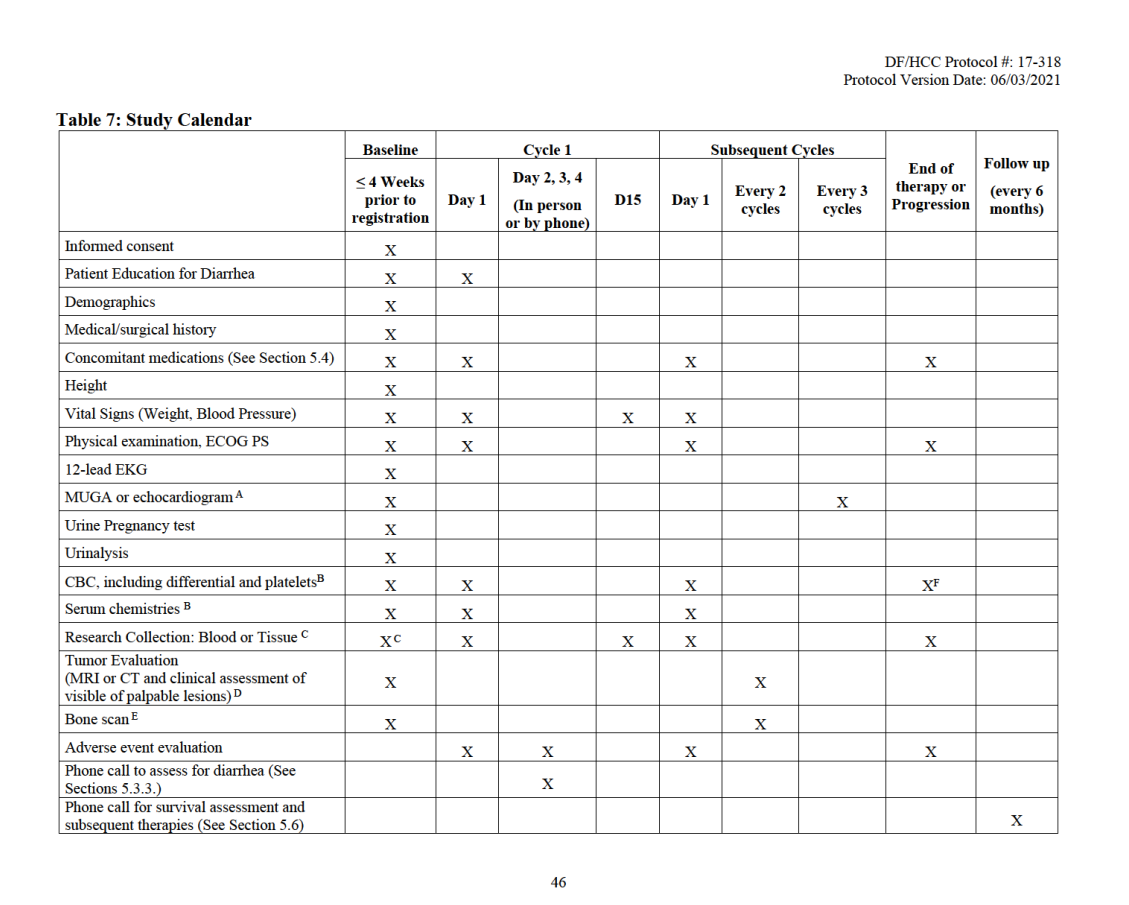

In [66]:
display.Image(f"{root}/study_protocol_images/protocol_002_img03_page46.png")

In [52]:
# page 46
IPython.display.HTML(elements[601].metadata.text_as_html)

Informed consent,~,,,,,,,,
Patient Education for Diarrhea,,,,,,,,,
Demographics,|,,,,,,,,
Medical/surgical history,[Pd,,,,,,,,
Concomitant medications (See Section 5.4),,,,,,,,,
Height,[et,,,,,,,,
"Vital Signs (Weight, Blood Pressure)",,,,,,,,,
"Physical examination, ECOG PS",[ed |,~,,,m,,,~,
12-lead EKG,,,,,,,,,
MUGA or echocardiogram“,TIPS,,,,,,,,
Urine Pregnancy test,,,,,,,,,


In [ ]:
# Store results in json
elements_to_json(elements, filename=f"{filename}.json") # Takes a while for file to show up on the Google Colab